# Airline Passenger Satisfaction

In [1]:
#importing the all the necessary necessary 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
Satisfaction_data_train = pd.read_csv("train.csv") 
Satisfaction_data_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
Satisfaction_data_test = pd.read_csv("test.csv")
Satisfaction_data_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
print(Satisfaction_data_test.shape)
print(Satisfaction_data_train.shape)

(25976, 25)
(103904, 25)


In [5]:
# combining the both train and test datasets
Satisfaction_data = pd.concat([Satisfaction_data_train, Satisfaction_data_test])
Satisfaction_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [6]:
Satisfaction_data.info()
#we could see the null values in "Arrival Delay in Minutes" column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [7]:
Satisfaction_data.isna().sum()
# We have null values in Arrival Delay in Minutes 

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [8]:
# we can drop the first row with the name unnamed

Satisfaction_data.drop(Satisfaction_data.columns[:1], axis=1, inplace=True)

In [9]:
Satisfaction_data.info()
# we have deleted the column witht column named "unnamed"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

In [10]:
Satisfaction_data.dropna(axis=0, inplace=True)
#droping the null value rows

In [11]:
Satisfaction_data.info()
# we have droped the row which are havng the null values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     12948

In [12]:
sat_corr = Satisfaction_data.corr()
#checking the correlation before changing the categorical values
sat_corr

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.020443,0.095027,-0.023242,-0.002056,0.013247,-0.000019,-0.000183,0.055428,0.052352,0.001944,0.055454,0.043914,0.074618,0.079154,0.078838,0.024425,-0.017506,-0.035657
Age,0.020443,1.000000,0.099863,0.015779,0.036780,0.022294,-0.000709,0.023283,0.207485,0.159229,0.074990,0.056743,0.038992,-0.048192,0.033182,-0.051778,0.052575,-0.009263,-0.011248
Flight Distance,0.095027,0.099863,1.000000,0.006554,-0.018901,0.064959,0.005378,0.057136,0.215082,0.157825,0.130518,0.111224,0.134548,0.064810,0.073635,0.059182,0.095658,0.001992,-0.001935
Inflight wifi service,-0.023242,0.015779,0.006554,1.000000,0.344846,0.714888,0.338547,0.132109,0.457422,0.121373,0.207887,0.120028,0.160414,0.120548,0.043847,0.110300,0.131163,-0.016046,-0.017749
Departure/Arrival time convenient,-0.002056,0.036780,-0.018901,0.344846,1.000000,0.437697,0.447411,0.001057,0.072175,0.008707,-0.008189,0.067046,0.010634,0.070646,0.091217,0.072166,0.010021,0.000610,-0.000942
Ease of Online booking,0.013247,0.022294,0.064959,0.714888,0.437697,1.000000,0.460155,0.030638,0.404944,0.028602,0.046669,0.039039,0.109341,0.039215,0.008835,0.035356,0.015150,-0.005330,-0.007033
Gate location,-0.000019,-0.000709,0.005378,0.338547,0.447411,0.460155,1.000000,-0.002825,0.002579,0.002493,0.002751,-0.029109,-0.005146,0.001097,-0.039294,0.000337,-0.006066,0.005943,0.005658
Food and drink,-0.000183,0.023283,0.057136,0.132109,0.001057,0.030638,-0.002825,1.000000,0.233524,0.575993,0.623366,0.057476,0.033215,0.035413,0.085103,0.035424,0.658026,-0.029351,-0.031715
Online boarding,0.055428,0.207485,0.215082,0.457422,0.072175,0.404944,0.002579,0.233524,1.000000,0.419169,0.284008,0.154272,0.123149,0.083563,0.204215,0.073973,0.329331,-0.019319,-0.022730
Seat comfort,0.052352,0.159229,0.157825,0.121373,0.008707,0.028602,0.002493,0.575993,0.419169,1.000000,0.611949,0.130654,0.104244,0.074617,0.189838,0.068912,0.679657,-0.027711,-0.030521


# Let us find how many loyal and non loyal customers are there

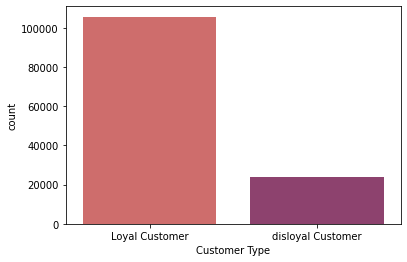

In [13]:
sns.countplot(x='Customer Type', data=Satisfaction_data, palette='flare')

In [14]:
# We have most of the loyal customer to the air lines

# Let us check how many are satisfied and not satisfied

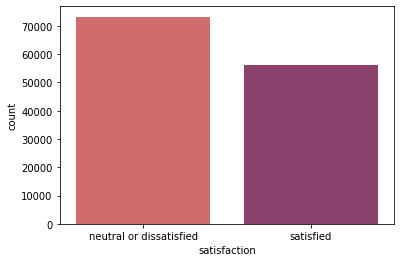

In [15]:
sns.countplot(x='satisfaction', data=Satisfaction_data, palette='flare')

# Now we will convert alll the categorical values to the int

In [16]:
valus = {'Male':0, 'Female':1, 'Loyal Customer':0,'disloyal Customer':1,'Business travel':0,'Personal Travel':1,'Business':0,'Eco':1,'Eco Plus':2,'neutral or dissatisfied':0,'satisfied':1}
Satisfaction_data = Satisfaction_data.replace(valus)

In [17]:
Satisfaction_data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,0,1,34,0,0,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,71167,0,0,23,0,0,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,37675,1,0,17,1,1,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,0
25974,90086,0,0,14,0,0,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


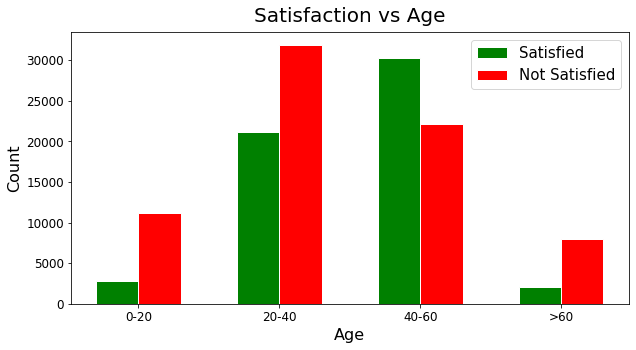

In [18]:
def plot_num(feature, bins, labels):
    
    plt.figure(figsize = (10,5))
    barWidth = 0.3

    # set height of bar
    bars1 = Satisfaction_data[Satisfaction_data['satisfaction']==1][feature].value_counts(bins = bins, sort = False)
    bars2 = Satisfaction_data[Satisfaction_data['satisfaction']==0][feature].value_counts(bins = bins, sort = False)

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='Satisfied')
    plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Not Satisfied')

    # Add xticks on the middle of the group bars
    plt.xlabel(feature, fontsize=16)
    plt.xticks([r - 0.5* barWidth + barWidth for r in range(len(bars1))], labels)

    plt.title(f'Satisfaction vs {feature}', fontsize = 20, pad = 10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Count', fontsize=16)

    # Create legend & Show graphic
    plt.legend(prop={'size': 15})
    plt.show()
bins_age = [0,20,40,60,100]
labels_age = ['0-20', '20-40', '40-60', '>60']

plot_num('Age',bins_age,labels_age)

In [19]:
Satisfaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  int64  
 2   Customer Type                      129487 non-null  int64  
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  int64  
 5   Class                              129487 non-null  int64  
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     12948

In [20]:
Satisfaction_data.corr()
#checking the correlation after changing the categorical values to Int values

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,0.001027,0.001359,0.020443,-0.000734,-0.104469,0.095027,-0.023242,-0.002056,0.013247,...,0.001944,0.055454,0.043914,0.074618,0.079154,0.078838,0.024425,-0.017506,-0.035657,0.012990
Gender,0.001027,1.000000,0.030803,-0.008984,-0.009215,0.011655,-0.003836,-0.005968,-0.008772,-0.006129,...,-0.003798,-0.006441,-0.031031,-0.036414,-0.008392,-0.038176,-0.002818,-0.003111,-0.001309,-0.011496
Customer Type,0.001359,0.030803,1.000000,-0.284275,-0.308210,0.042959,-0.226134,-0.005884,-0.206916,-0.018183,...,-0.106157,-0.054040,-0.046885,0.025015,-0.031258,0.023567,-0.081433,0.004131,0.004730,-0.185925
Age,0.020443,-0.008984,-0.284275,1.000000,-0.044910,-0.116967,0.099863,0.015779,0.036780,0.022294,...,0.074990,0.056743,0.038992,-0.048192,0.033182,-0.051778,0.052575,-0.009263,-0.011248,0.134001
Type of Travel,-0.000734,-0.009215,-0.308210,-0.044910,1.000000,0.486598,-0.267064,-0.105574,0.257208,-0.133891,...,-0.152708,-0.059700,-0.139540,-0.032921,0.016530,-0.023417,-0.084257,-0.006336,-0.005830,-0.449794
Class,-0.104469,0.011655,0.042959,-0.116967,0.486598,1.000000,-0.427144,-0.024912,0.087185,-0.094989,...,-0.183178,-0.210748,-0.198828,-0.166507,-0.157380,-0.159110,-0.129715,0.009553,0.014162,-0.448338
Flight Distance,0.095027,-0.003836,-0.226134,0.099863,-0.267064,-0.427144,1.000000,0.006554,-0.018901,0.064959,...,0.130518,0.111224,0.134548,0.064810,0.073635,0.059182,0.095658,0.001992,-0.001935,0.298206
Inflight wifi service,-0.023242,-0.005968,-0.005884,0.015779,-0.105574,-0.024912,0.006554,1.000000,0.344846,0.714888,...,0.207887,0.120028,0.160414,0.120548,0.043847,0.110300,0.131163,-0.016046,-0.017749,0.283291
Departure/Arrival time convenient,-0.002056,-0.008772,-0.206916,0.036780,0.257208,0.087185,-0.018901,0.344846,1.000000,0.437697,...,-0.008189,0.067046,0.010634,0.070646,0.091217,0.072166,0.010021,0.000610,-0.000942,-0.054457
Ease of Online booking,0.013247,-0.006129,-0.018183,0.022294,-0.133891,-0.094989,0.064959,0.714888,0.437697,1.000000,...,0.046669,0.039039,0.109341,0.039215,0.008835,0.035356,0.015150,-0.005330,-0.007033,0.168704


In [21]:
X = Satisfaction_data.drop('satisfaction', axis = 1)
y = Satisfaction_data['satisfaction']

In [22]:
#diving the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Using Logistics Regression done the below model to predict the satisfacfion field

In [23]:
logistic_model = LogisticRegression(random_state = 10)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [24]:
logistic_pred = logistic_model.predict(X_test)
print( classification_report(y_test, logistic_pred) )

print(F'Accuracy:',accuracy_score(y_test, logistic_pred))
print(F'Precision:', precision_score(y_test, logistic_pred))
print(F'Recall:', recall_score(y_test, logistic_pred))
print(F'F1 Score:', f1_score(y_test, logistic_pred))



              precision    recall  f1-score   support

           0       0.74      0.67      0.70     14674
           1       0.61      0.69      0.65     11224

    accuracy                           0.68     25898
   macro avg       0.68      0.68      0.67     25898
weighted avg       0.68      0.68      0.68     25898

Accuracy: 0.6771179241640282
Precision: 0.6139149816908136
Recall: 0.6870990734141126
F1 Score: 0.6484486672832758


In [25]:
print(F'Confusion Matrix:',confusion_matrix(y_test, logistic_pred))

Confusion Matrix: [[9824 4850]
 [3512 7712]]


# Using Decision Tree Classifier, done the below model to predict the satisfacfion field

In [26]:
dtclassifier = DecisionTreeClassifier(max_depth = 15)
dtclassifier.fit(X_train, y_train)
dtcal_pred = dtclassifier.predict(X_test)

print(classification_report(dtcal_pred, y_test))
print(F'Confusion Matrix:',confusion_matrix(y_test, dtcal_pred))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14873
           1       0.94      0.96      0.95     11025

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898

Confusion Matrix: [[14185   489]
 [  688 10536]]


In [27]:
print(F'Accuracy:',accuracy_score(y_test, dtcal_pred))
print(F'Precision:', precision_score(y_test, dtcal_pred))
print(F'Recall:', recall_score(y_test, dtcal_pred))
print(F'F1 Score:', f1_score(y_test, dtcal_pred))

Accuracy: 0.954552475094602
Precision: 0.9556462585034013
Recall: 0.9387027797576621
F1 Score: 0.9470987460110566


# Using RandomForestClassifier done the below model to predict the satisfacfion field

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_cal = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 10)
forest_cal.fit(X_train, y_train)
forest_pred = forest_cal.predict(X_test)

In [29]:
print( classification_report(y_test, forest_pred ))
print( F'Confusion Matrix:',confusion_matrix(y_test,forest_pred) )

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14674
           1       0.98      0.94      0.96     11224

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.97      0.96      0.96     25898

Confusion Matrix: [[14419   255]
 [  654 10570]]


In [30]:
print(F'Accuracy:',accuracy_score(y_test, forest_pred))
print(F'Precision:', precision_score(y_test, forest_pred))
print(F'Recall:', recall_score(y_test, forest_pred))
print(F'F1 Score:', f1_score(y_test, forest_pred))

Accuracy: 0.9649007645378022
Precision: 0.9764434180138568
Recall: 0.9417320028510335
F1 Score: 0.9587736405279152


In [31]:
# We have used 3 classfication model to check the which model is giving the best predicted values
# By seeing the above results we can say that the RandomForestClassifier has given the best predicted values.